# Superdense Coding

<strong>Idea</strong>: 
Alice and Bob have one qubit each of a Bell pair.
A classical message is coded into Alice's qubit as single-qubit operations. The coded qubit is sent to Bob. The classical message is then decoded by Bob via some operations on his qubit. Measurement of the two qubits Bob has gives the classical message.

In [86]:
from qiskit import Aer, assemble, QuantumCircuit
sim = Aer.get_backend('aer_simulator')

In [87]:
def make_bell_ckt():
    """makes the bell state |\Phi^+\rangle"""
    c = QuantumCircuit(2)
    c.h(1); c.cx(1, 0)
    c.barrier()
    return c

In [88]:
def code(qckt, index, classical_message):
    if len(classical_message) != 2: print("exactly two bits of data expected.\n"); return None
    if classical_message[1] == "1": qckt.x(index)
    if classical_message[0] == "1": qckt.z(index)
    qckt.barrier()
    return qckt

In [89]:
def decode(qckt):
    qckt.cx(1, 0); c.h(1)
    return qckt

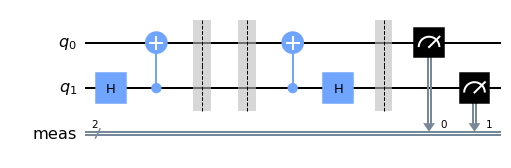

In [90]:
c = make_bell_ckt()
c = decode(code(c, 1, "00"))
c.measure_all()
c.draw("mpl")

In [91]:
ans = sim.run(assemble(c)).result().get_counts().keys()
ans = list(ans)[0]
print(ans)

00
